In [124]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?


In [125]:
wholesale_drop_df = pd.read_csv("Wholesale+Customers+Data.csv")

In [126]:
wholesale_drop_df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [127]:
print('Channel & Retail:')
wholesale_drop_df.describe(include='all').T

Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [128]:
wholesale_spending_df = copy.deepcopy(wholesale_drop_df)

In [129]:
wholesale_spending_df['Spending'] =wholesale_drop_df['Fresh']+wholesale_drop_df['Milk']+wholesale_drop_df['Grocery']+wholesale_drop_df['Frozen']+wholesale_drop_df['Detergents_Paper']+wholesale_drop_df['Delicatessen']
wholesale_customer_spending_df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [130]:
regiondf = wholesale_spending_df.groupby('Region')['Spending'].sum()
print(regiondf)
print()
channeldf = wholesale_spending_df.groupby('Channel')['Spending'].sum()
print(channeldf)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

Text(0.5, 1.0, 'Item - Fresh')

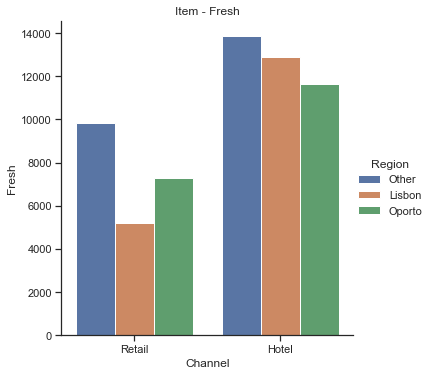

In [131]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

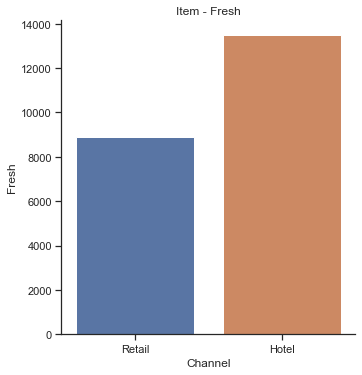

In [132]:
sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

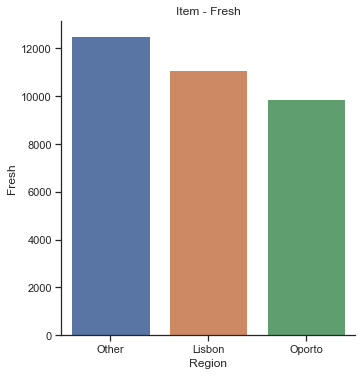

In [133]:
sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Fresh')

Based on the plot, Fresh item is sold more in the Retail channel

Text(0.5, 1.0, 'Item - Milk')

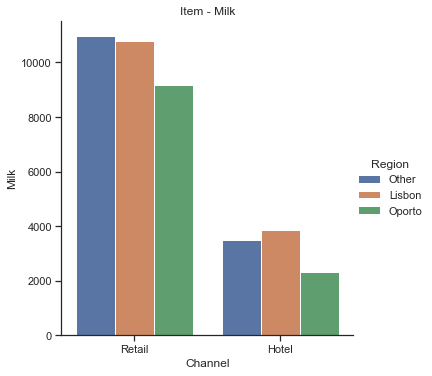

In [134]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

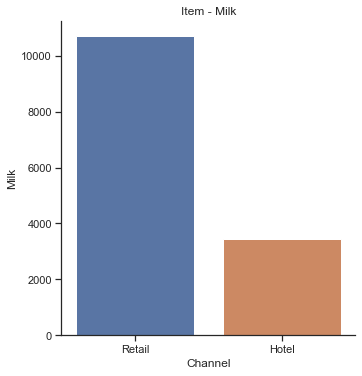

In [135]:
sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

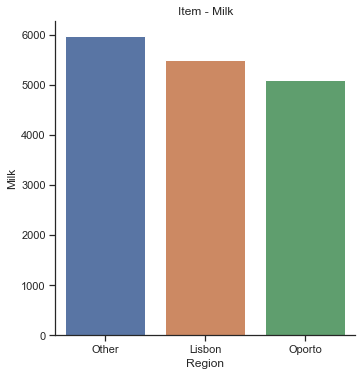

In [136]:
sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Milk')

Grocery

Text(0.5, 1.0, 'Item - Grocery')

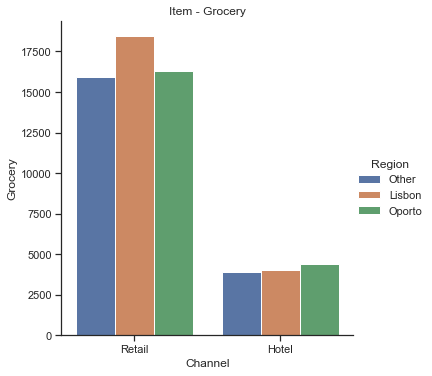

In [137]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

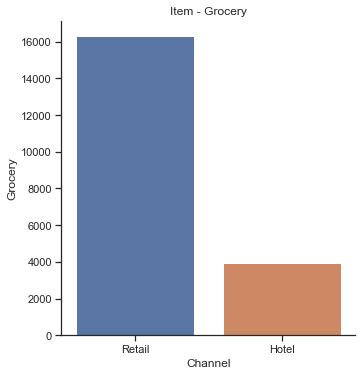

In [138]:
sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

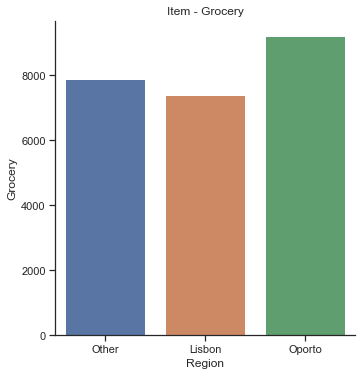

In [139]:
sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Grocery')

Frozen

Text(0.5, 1.0, 'Item - Frozen')

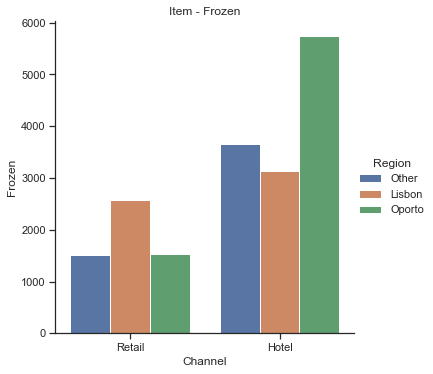

In [140]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

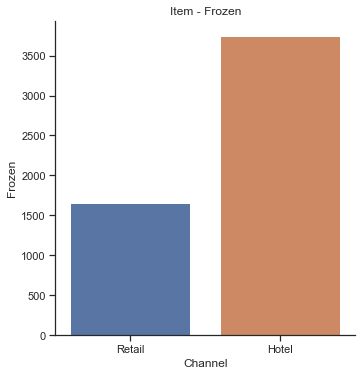

In [141]:
sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

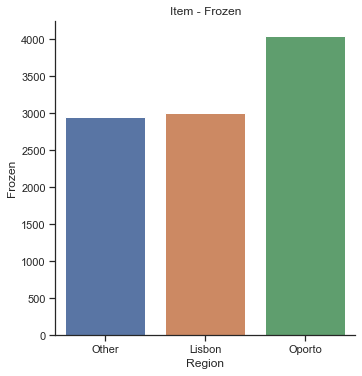

In [142]:
sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Frozen')

Detergent paper

Text(0.5, 1.0, 'Item - Detergents_Paper')

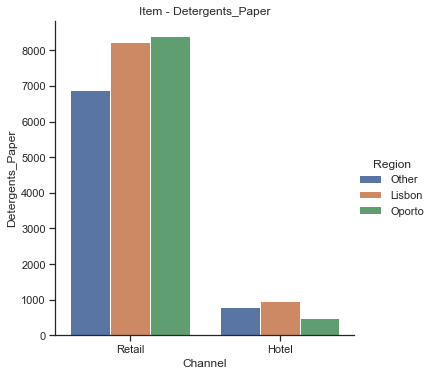

In [143]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

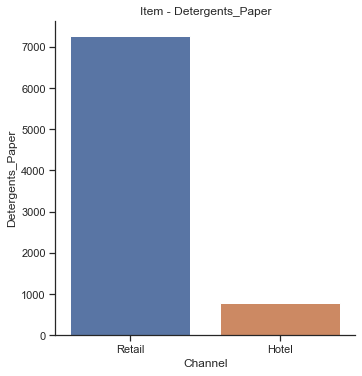

In [144]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

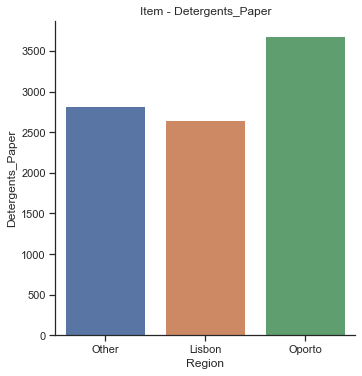

In [145]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Delicatessen')

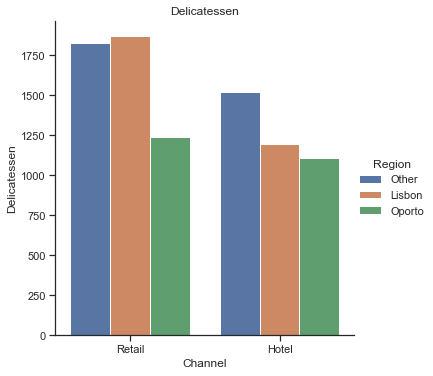

In [146]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

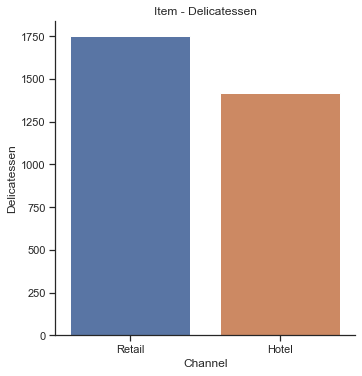

In [147]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

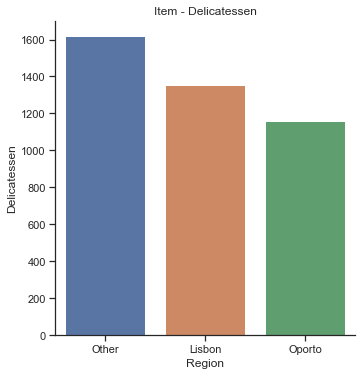

In [148]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=wholesale_drop_df)
plt.title('Item - Delicatessen')

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [149]:
products = wholesale_drop_df[wholesale_drop_df.columns[+2:wholesale_drop_df.columns.size]]
standard_deviation_items = products.std()
standard_deviation_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

In [150]:
cv_fresh = np.std(products['Fresh']) / np.mean(products['Fresh'])
cv_fresh

1.0527196084948245

In [151]:
cv_milk = np.std(products['Milk']) / np.mean(products['Milk'])
cv_milk

1.2718508307424503

In [152]:
cv_grocery = np.std(products['Grocery']) / np.mean(products['Grocery'])
cv_grocery

1.193815447749267

In [153]:
cv_frozen = np.std(products['Frozen']) / np.mean(products['Frozen'])
cv_frozen

1.5785355298607762

In [154]:
cv_detergents_paper = np.std(products['Detergents_Paper']) / np.mean(products['Detergents_Paper'])
cv_detergents_paper

1.6527657881041729

In [155]:
cv_delicatessen = np.std(products['Delicatessen']) / np.mean(products['Delicatessen'])
cv_delicatessen

1.8473041039189306

In [156]:
variance_items = products.var()
variance_items

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.


<AxesSubplot:>

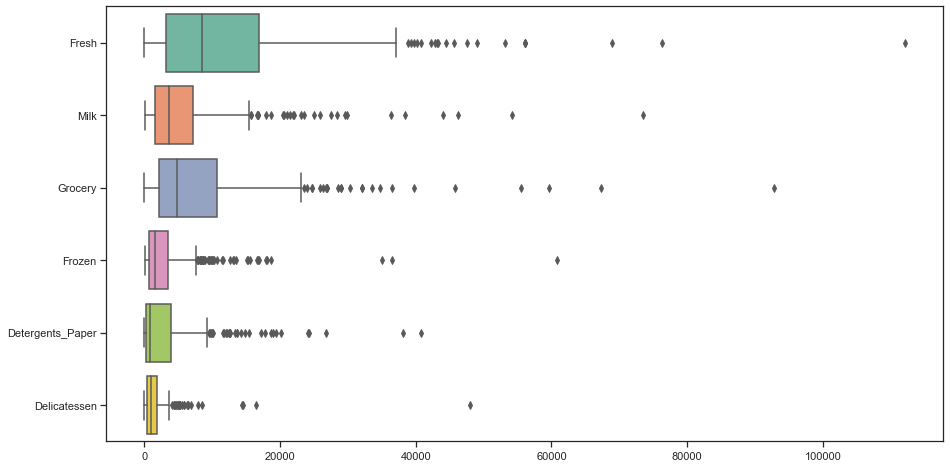

In [157]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")

Yes there are outliers in each case which is given by the black dots in the above figure

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

By calculating the coefficient of variations there are not consistent and are required to be minimized. The spending of Hotel and Retail channel should be close to equal. need to shift the focus from fresh and grocery only.